[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_03_arboles_de_decision_sklearn-published.ipynb)

## Scikit-learn (sklearn)

### Primera aplicación, clasificación de "iris"

El dataset Fisher's Iris es un conjunto de datos multivariado introducido por Ronald Fisher en su paper de 1936 *The use of multiple measurements in taxonomic problems* como un ejemplo de análisis discriminante lineal.


![Representación de las flores del data set](https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/n03-iris.png)



El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros y además se tiene el nombre de la especie a la que pertence. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

Antes de empezar, cargamos todas las bibliotecas que vamos a usar. Como iris es un dataset muy común, forma parte de los datasets que provee `sklearn`.


Acá vemos como cargarlo:

In [ ]:
# Cargamos algunas bibliotecas
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5] # para ver los gráficos más grandes

# Cargamos el dataset que usaremos hoy
from sklearn.datasets import load_iris
iris_dataset = load_iris()

### Antes de empezar: exploración del objeto ```iris_dataset```

1. ¿Qué tipo de objeto es `iris_dataset`?
1. Listar las claves que tiene.
1. Listar los valores que puede tomar la variable `target` (las que vamos a querer aprender).
1. Listar los atributos del dataset.
1. ¿Qué hay en las primeras 5 filas?
1. ¿Qué dimensión tiene el dataset?
1. ¿Cuál es el `target` en las últimas 5 filas?

Además, hay una descripción del dataset incluida en el objeto que se puede acceder con: `iris_dataset.DESCR`.


In [ ]:
#Veamos el bunch como dataframe para verlo mejor agregando la columna de target (qué flor es)
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['target'] = iris_dataset.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Veamos cuál es el tipo de iris_dataset
type(iris_dataset) #es como un diccionario de Python pero con más atributos y métodos adicionales diseñados
                   #específicamente para su uso con conjuntos de datos de scikit-learn

sklearn.utils._bunch.Bunch

In [ ]:
#Veamos las claves que tiene
iris_dataset.keys() #nos muestra las claves del diccionario

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#Veamos los valores que puede tomar la variable target
iris_dataset.target #los valores que puede tomar son: 0, 1 y 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Vemos que los target names son los nombres de las flores
iris_dataset.target_names
# 0 = setosa
# 1 = versicolor
# 2 = virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#Veamos los nombres de los atributos
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df.head(5) #vemos las primeras 5 filas. Son todas setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Veamos la dimensión del dataframe
iris_df.shape #a este dataset le agregamos la columna target

(150, 5)

In [ ]:
iris_dataset.data.shape #el dataset original no tiene la columan target

(150, 4)

In [ ]:
iris_df.tail(5) #vemos que el target de las ultimas 5 filas es 2 = virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
iris_df.describe() #nos da un resumen de las variables numéricas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Paso 1: División de datos (training - testing)

Ya veremos en las próximas clases de la materia, pero una forma de mitigar la percepción de cuán bien (o mal) anda nuestro modelo, es separar nuestros datos en 2:

  - una parte para mirar, entender y **entrenar**
  - otra parte que solo usaremos para medir la performance

(más detalles en breve)

<img src="https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/n03-train-test-split.png"  width="600">
Fuente imagen: https://www.sharpsightlabs.com/blog/scikit-train_test_split/


Para esto usaremos la función `train_test_split` de `sklearn` [(ver Documentación)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) y generaremos:
  - `X_train`: es una matriz con un subconjunto del dataset original con los atributos de las observaciones
  - `y_train`: es un vector con la clase a la que corresponde cada instancia de `X_train`
  - `X_test`: es el subconjunto restante del dataset original que no fue incluido en `X_train`
  - `y_test`: es un vector con la clase a la que corresponde cada instancia de `X_test`

In [ ]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                    iris_dataset['data'],
                    iris_dataset['target'],
                    random_state=4, # Controls the shuffling applied to the data before applying the split. Es una semilla
                    test_size=0.1) #If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.

Podemos verificar los tamaños para ver que coinciden con lo previsto. Sugerencia: explorar los objetos.

In [ ]:
print(f"X_train dimensión: {X_train.shape}")
print(f"y_train dimensión: {y_train.shape}")

print(f"X_test dimensión: {X_test.shape}") #está bien, porque el 10% de 150 es 15
print(f"y_test dimensión: {y_test.shape}")

X_train dimensión: (135, 4)
y_train dimensión: (135,)
X_test dimensión: (15, 4)
y_test dimensión: (15,)


**Pregunta**

¿Qué orden tienen los datos en esta partición? ¿Preservan el mismo orden? *Hint* Ver documentación de `train_test_split`

In [ ]:
X_train == iris_dataset.data[0:135] #vemos que tienen distinto orden, pero por ejemplo el tercero es el mismo, porque toma el testeo de forma aleatoria

array([[False, False, False,  True],
       [False, False, False, False],
       [ True,  True,  True,  True],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False,  True, False, False],
       [ True,  True, False, False],
 

### Paso 2: Exploración de los datos

Como vimos anteriormente, los datos se encuentran dentro de un _array_ de `numpy`. Podemos pasarlo a un dataframe de `pandas` para tener una mejor visualización.


In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,3.1,1.5,0.2
1,5.0,2.0,3.5,1.0
2,4.7,3.2,1.3,0.2
3,4.8,3.4,1.9,0.2
4,6.3,2.7,4.9,1.8
5,5.0,3.2,1.2,0.2
6,6.7,3.3,5.7,2.1
7,6.2,2.2,4.5,1.5
8,5.0,3.4,1.6,0.4
9,4.7,3.2,1.6,0.2


Antes de empezar a construir un clasificador, realicemos una breve exploración de los datos:

1. ¿qué se ve en el siguiente gráfico?
1. ¿cuántas clases hay?
1. ¿qué variable (o pares de variables) parecen separar mejor a los datos?


In [ ]:
y_train

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2,
       1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2])

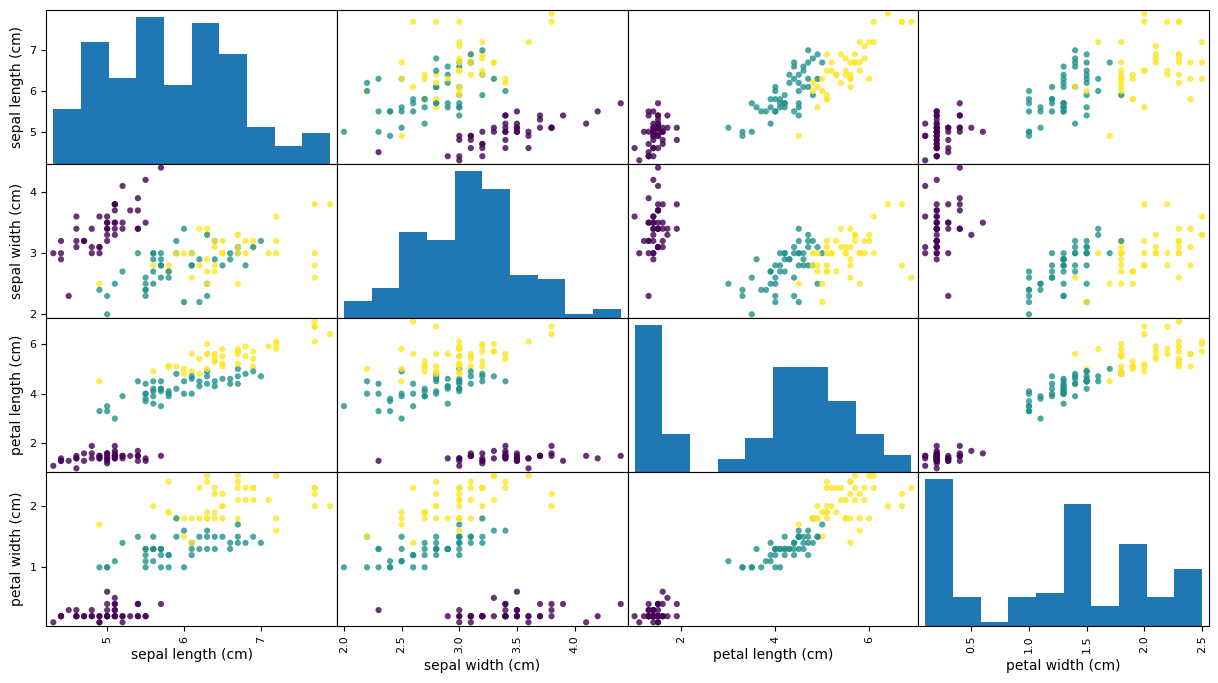

In [ ]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, s=80, figsize=(15, 8), alpha=.8);

Podemos observar lo siguiente:
* Podemos observar que hay 3 clases: una por cada flor.
* Los atributos petal lenght y petal width estan linealmente correlacionados. Además petal lenght y sepal lenght también.
* Vemos que la categoría violeta siempre está más separado del resto de las categorías.
* Entendemos que para leer los histogramas debemos mirar el eje x. Vemos la distribución de cada variable.
* Viendo los histogramas, notamos que los valores de sepal width se centran entre 3 y 3.5.

### Paso 3: Construcción de un modelo

Para construir nuestro árbol creamos un objeto de la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) a la que más tarde cambiaremos parámetros.

En este punto definimos que:
  - la profundidad máxima del árbol será 3
  - que el criterio para la selección en cada nodo sera `entropy`
  


In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")

Una vez creado nuestro clasificador, debemos entrenarlo con el método `fit`.

Es interesante mencionar que en `sklearn` siempre usaremos `fit()` para entrenar pasandole los datos. La configuración vendrá en el constructor.

**Antes** de ejecutar `fit` explorar `arbol.fit?`.

In [ ]:
arbol.fit?

In [ ]:
arbol.fit(X_train, y_train) #le damos los datos de entrenamiento y los target values

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Paso 4: Predicciones

Si queremos predecir una nueva instancia, por ejemplo:

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 4)


Necesitamos contar con nuestro clasificador (previamente entrenado) e invocar a `predict` con la(s) instancia(s) que queremos predecir.

**Antes** de ejecutar `predict` explorar `arbol.predict?`.

In [ ]:
arbol.predict?

In [ ]:
prediction = arbol.predict(X_new) #le pasamos el dato que queremos predecir
print(f"Predicción: {prediction}")
print(f"Nombre de la clase predicha: {iris_dataset['target_names'][prediction]}")

Predicción: [0]
Nombre de la clase predicha: ['setosa']


### Paso 5: Evaluación del modelo

Ahora ya estamos listos para poder verificar la performance de nuestro árbol con los datos que habíamos separado para _test_ previamente.

In [ ]:
# predecimos los valores para las instacias que no vimos
y_pred = arbol.predict(X_test) #le pasamos todos los datos test

print(f"Predicciones:   {y_pred}\nValores reales: {y_test}")
# Podemos calcular el accuracy (exactitud) comparando los valores predichos contra los reales,
# para ello contamos cuántas coincidencias hubo y dividimos por la cantidad de comparaciones que hicimos:
print(f"Accuracy sobre el test set: {np.mean(y_pred == y_test)}")

#También podemos invocar al método score que viene con los DecisionTreeClassifier
print(f"Accuracy sobre el test set: {arbol.score(X_test, y_test)}")

Predicciones:   [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2]
Valores reales: [2 0 2 2 2 1 1 0 0 2 0 0 0 1 2]
Accuracy sobre el test set: 0.9333333333333333
Accuracy sobre el test set: 0.9333333333333333


Podemos observar el resultado de nuestra clasificación con las matrices de confusión que tienen:
- cada fila los valores observados o reales
- cada columna los valores predichos

que si integramos esta información nos da:
- $m_{i,i}$ las instancias bien clasificadas
- $m_{i,j}\ (con\ i\neq j)$ las instancias mal clasificadas

Ej. si tenemos la siguiente matriz de confusión:

||setosa|versicolor|virginica|
|-----|-----|-----|-----|
|**setosa**| 6 | 0 | 0 |
|**versicolor**| 0 | 2 | 1 |
|**virginica**| 0 | 0 | 6 |

Podemos decir que todas las instancias de la clases **setosa** y **virginica** fueron correctamente clasificadas, mientras que para las de **versicolor** 2 fueron correctas, mientras que una fue clasificada con **virginica** fallando en este caso la predicción.

Si sumamos por filas podemos ver que en _test_ tenemos:
  - 6 de clase **setosa**
  - 3 de clase **versicolor**
  - 6 de clase **virginica**
  
Y si sumamos por columna podemos ver la cantidad predicha para cada clase:
  - 6 de clase **setosa**
  - 2 de clase **versicolor**
  - 7 de clase **virginica**
  

In [ ]:
print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
matriz_confusion = pd.DataFrame(confusion, columns=iris_dataset['target_names'], index=iris_dataset['target_names'])
display(matriz_confusion)

Matriz de confusión:


,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,2,1
virginica,0,0,6


In [ ]:
matriz_confusion

,setosa,versicolor,virginica
setosa,6,0,0
versicolor,0,2,1
virginica,0,0,6


### En resumen

1. separamos nuestro data set original en entrenamiento (_train_) y evaluación (_test_)
1. armamos y entrenamos (`fit`) un árbol de decisión con parámetros:
    - `max_depth=3`
    - `criterion="entropy"`
1. evaluamos el árbol en el conjunto de entrenamiento y de evaluación

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=4, test_size=0.1)

arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol.fit(X_train, y_train)

print(f"Score sobre el training set: {arbol.score(X_train, y_train):.2f} ¿qué indica este número?")
print(f"Score sobre el test set: {arbol.score(X_test, y_test):.2f}  ¿qué indica este número?")


Score sobre el training set: 0.98 ¿qué indica este número?
Score sobre el test set: 0.93  ¿qué indica este número?


1) No nos dice mucho porque ajustamos el árbol con estos datos. La única razón por la que no da 100% es porque le pusimos una altura máxima al árbol: 3 niveles
2) El porcentaje de aciertos del test set, es decir, el porcentaje que predijo bien de los datos de testeo.

### Experimentando con Árboles de Decisión:

1. Probar distintos valores para: `max_depth` y graficar la performance (_accuracy_) sobre el conjunto de test al variar este parámetro.
1. ¿Qué ocurre con la _accuracy_ sobre train con respecto al valor sobre test de un mismo clasificador?
1. ¿Cuál es el máximo valor de profundidad que se alcanza?¿cómo lo obtengo?¿por qué?
    Para responder estas pregunta se puede acceder a la documentación con el comando `sklearn.tree.DecisionTreeClassifier?`
1. Graficar la importancia de features para el clasificador con mejor _Accuracy_ en el test_set. Explorar el atributo `feature_importances_` de un árbol entrenado, ¿qué atributos fueron los mas relevantes? ¿es el mismo método que el visto en clase?
1. Evaluar la importancia de features utilizando `permutation_importance`, graficar.
    
1. Graficar el árbol obtenido (ver función `dibujar_arbol` provista en la próxima celda).

    1. ¿qué representa cada nodo?
    1. ¿qué información contiene cada nodo?
    1. ¿qué representa el color?
    1. ¿qué son los ejes?

In [ ]:
# Pregunta 1
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=4, test_size=0.1)

arbol_altura1 = DecisionTreeClassifier(max_depth=1, criterion="entropy")
arbol_altura1.fit(X_train, y_train)

arbol_altura2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
arbol_altura2.fit(X_train, y_train)

arbol_altura3 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol_altura3.fit(X_train, y_train)

arbol_altura4 = DecisionTreeClassifier(max_depth=4, criterion="entropy")
arbol_altura4.fit(X_train, y_train)

arbol_altura5 = DecisionTreeClassifier(max_depth=5, criterion="entropy")
arbol_altura5.fit(X_train, y_train)

print(f"Score sobre el training set altura 1: {arbol_altura1.score(X_train, y_train):.2f}")
print(f"Score sobre el test set altura 1: {arbol_altura1.score(X_test, y_test):.2f}")

print(f"Score sobre el training set altura 2: {arbol_altura2.score(X_train, y_train):.2f}")
print(f"Score sobre el test set altura 2: {arbol_altura2.score(X_test, y_test):.2f}")

print(f"Score sobre el training set altura 3: {arbol_altura3.score(X_train, y_train):.2f}")
print(f"Score sobre el test set altura 3: {arbol_altura3.score(X_test, y_test):.2f}")

print(f"Score sobre el training set altura 4: {arbol_altura4.score(X_train, y_train):.2f}")
print(f"Score sobre el test set altura 4: {arbol_altura4.score(X_test, y_test):.2f}")

print(f"Score sobre el training set altura 5: {arbol_altura5.score(X_train, y_train):.2f}")
print(f"Score sobre el test set altura 5: {arbol_altura5.score(X_test, y_test):.2f}")

alturas = np.array([1, 2, 3, 4, 5])

accuracies = np.array([arbol_altura1.score(X_test, y_test),arbol_altura2.score(X_test, y_test),arbol_altura3.score(X_test, y_test),arbol_altura4.score(X_test, y_test),arbol_altura5.score(X_test, y_test)])
accuracies_training = np.array([arbol_altura1.score(X_train, y_train),arbol_altura2.score(X_train, y_train),arbol_altura3.score(X_train, y_train),arbol_altura4.score(X_train, y_train),arbol_altura5.score(X_train, y_train)])

Score sobre el training set altura 1: 0.67
Score sobre el test set altura 1: 0.60
Score sobre el training set altura 2: 0.96
Score sobre el test set altura 2: 0.93
Score sobre el training set altura 3: 0.98
Score sobre el test set altura 3: 0.93
Score sobre el training set altura 4: 1.00
Score sobre el test set altura 4: 0.93
Score sobre el training set altura 5: 1.00
Score sobre el test set altura 5: 0.93


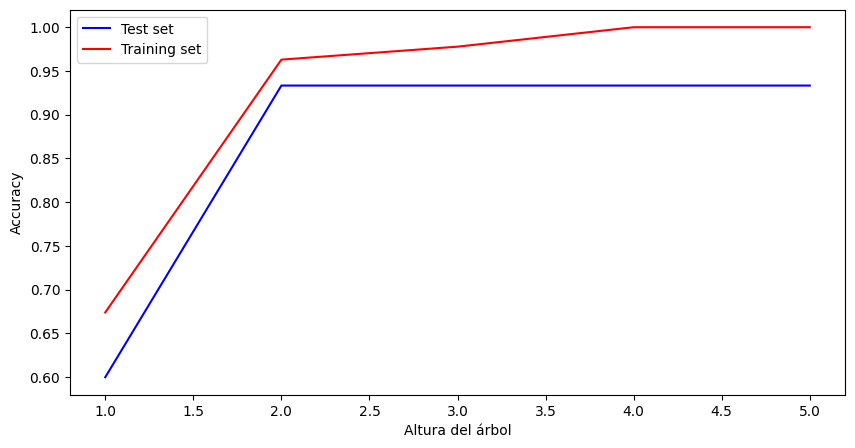

In [ ]:
plt.plot(alturas, accuracies, label = 'Test set', color='blue')
plt.plot(alturas, accuracies_training, color='red', label = 'Training set')
plt.xlabel('Altura del árbol')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Pregunta 2
En todos los casos vemos que la accuracy del Training set es más grande que la del Test set.

#### Pregunta 3

In [ ]:
print(arbol_altura1.get_depth())
print(arbol_altura2.get_depth())
print(arbol_altura3.get_depth())
print(arbol_altura4.get_depth())
print(arbol_altura5.get_depth())
#Vemos que el valor de la altura máxima es 4 (como se veía en el gráfico), desde el árbol de altura máxima 4
#ya todos tienen altura máxima 4. Esto lo podemos ver ya que en el gráfico vemos que desde esa altura los training test
#tienen una Accuracy del 100%.

1
2
3
4
4


#### Pregunta 4

In [ ]:
print(arbol_altura1.feature_importances_)
print(arbol_altura2.feature_importances_)
print(arbol_altura3.feature_importances_)
print(arbol_altura4.feature_importances_)
print(arbol_altura5.feature_importances_)

[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0.         0.         0.68128655 0.31871345]
[0.         0.01288086 0.64003349 0.34708564]
[0.         0.01288086 0.06518314 0.921936  ]


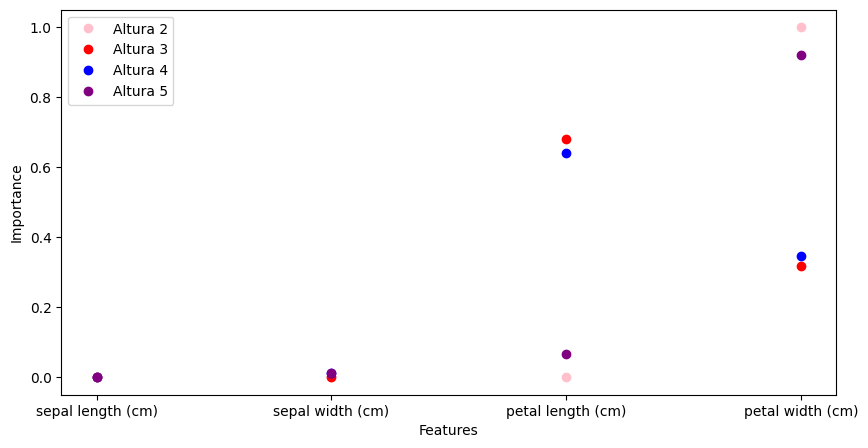

In [ ]:
plt.plot(iris_dataset.feature_names, arbol_altura2.feature_importances_,'o' ,label='Altura 2', color = "pink")
plt.plot(arbol_altura3.feature_importances_,'o', label='Altura 3', color = "red")
plt.plot(arbol_altura4.feature_importances_,'o', label='Altura 4', color = "blue")
plt.plot(arbol_altura5.feature_importances_,'o', label='Altura 5', color = "purple")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend()
plt.show()

Vemos que los atributos que fueron más importantes son petal length (cm) y petal width (cm).

In [ ]:
arbol_altura2.feature_importances_?

Vemos la importancia con Gini normalizando la importancia de cada atributo, que es lo mismo que vimos en clase (aunque en clase cuando hicimos el algoritmo nos quedó una forma de medida genérica)

#### Pregunta 5

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
permutation_importance(arbol_altura3, X_test, y_test, n_repeats=10,random_state=0)
#COMO SE INTERPRETA ESTO? DONDE VEO LA IMPORTANCIA DE CADA FEATURE?

{'importances_mean': array([0.        , 0.        , 0.45333333, 0.02666667]),
 'importances_std': array([0.        , 0.        , 0.08326664, 0.03265986]),
 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.4       , 0.33333333, 0.6       , 0.46666667, 0.33333333,
         0.53333333, 0.46666667, 0.4       , 0.53333333, 0.46666667],
        [0.06666667, 0.06666667, 0.        , 0.        , 0.06666667,
         0.        , 0.        , 0.        , 0.        , 0.06666667]])}

In [ ]:
""" plt.plot(iris_dataset.feature_names, arbol_altura2.inspection.permutation_importance_,'o' ,label='Altura 2', color = "pink")
plt.plot(arbol_altura3.feature_importances_,'o', label='Altura 3', color = "red")
plt.plot(arbol_altura4.feature_importances_,'o', label='Altura 4', color = "blue")
plt.plot(arbol_altura5.feature_importances_,'o', label='Altura 5', color = "purple")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend()
plt.show() """

' plt.plot(iris_dataset.feature_names, arbol_altura2.inspection.permutation_importance_,\'o\' ,label=\'Altura 2\', color = "pink")\nplt.plot(arbol_altura3.feature_importances_,\'o\', label=\'Altura 3\', color = "red")\nplt.plot(arbol_altura4.feature_importances_,\'o\', label=\'Altura 4\', color = "blue")\nplt.plot(arbol_altura5.feature_importances_,\'o\', label=\'Altura 5\', color = "purple")\nplt.xlabel(\'Features\')\nplt.ylabel(\'Importance\')\nplt.legend()\nplt.show() '

In [ ]:
# !pip3 install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from six import StringIO  #pip3 install six
####from sklearn.externals.six import StringIO  # opción para versiones más viejas de sklearn
from IPython.display import Image, display
import pydotplus


def dibujar_arbol(clf, c_name=iris_dataset.target_names, f_name=iris_dataset.feature_names):
    #
    # modo de uso: dibujar_arbol(arbol)
    #
    dot_data = StringIO()
    sklearn.tree.export_graphviz(clf, out_file = dot_data,
                    filled = True,
                    class_names = c_name,
                    feature_names = f_name,
                    special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

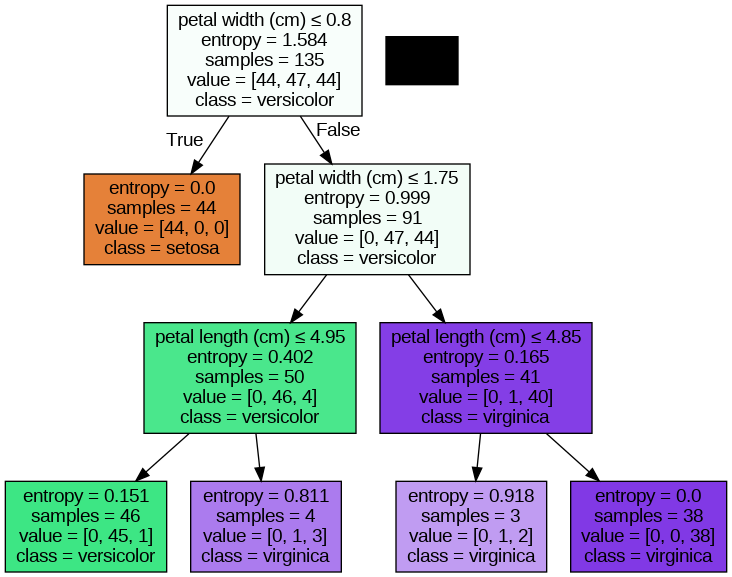

In [ ]:
dibujar_arbol(arbol)

#### Pregunta 6

* ¿qué representa cada nodo? ¿qué información contiene cada nodo?
Cada nodo representa un corte a valores de un atributo. Los nodos hoja son la clasificación final.
Entropy es la entropía hasta dicho nodo, es la medida de que tan bien hizo el corte anterior, es decir, es qué tan mezclados quedaron los datos al hacer el corte del nodo anterior (para el nodo raíz sería la mezcla de los datos originales).
Samples sería la cantidad de datos training que llegaron a ese nodo. Luego, value sería para cada clasificación cuántos datos tenemos. Por último, class es la clase mayorítaria dentro de ese corte, en las hojas es el valor que se termina clasificando.

* ¿qué representa el color?
El color representa la homogeneidad en cada nodo. El color naranja está vinculado a la flor setosa, el color verde a versicolor y el violeta a virginica, mientras mas claritos los colores es porque más mezcla hay.

* ¿qué son los ejes?
El de la izquierda es verdadero y el de la derecha es falso al corte.

### Sobre fronteras de decisión

A continuación exploraremos dentro del dataset iris el funcionamiento de las fronteras de decisión.
Para hacerlo nos quedaremos sólo con 2 dimensiones del dataset: `sepal length (cm)`, `sepal width (cm)`.

En la próxima celda tenemos la función `explore_decision_tree_boundaries` que si es llamada sin parámetros corre un árbol de clasificación con los parámetros por defecto del mismo y genera una representación de como el plano conformado por las 2 dimensiones propuesta se dividen en las clases que predecirán y árbol que generó dichas fronteras.

Explorar diversos valores permitidos de profundidad máxima permitido del árbol del clasificador y analizar las visualizaciones generadas en términos de:
  - sobreajuste
  - subajuste

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

def explore_decision_tree_boundaries(max_depth=None, criterion="entropy", data_set=iris_dataset, cols=[0, 1]):
    n_classes, plot_colors, plot_step = 3, "ryb", 0.02
    fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')

    X = data_set["data"][:, cols]
    y = data_set["target"]

    # Build and train Classifier
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(1, 1, 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        tree,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=data_set.feature_names[cols[0]],
        ylabel=data_set.feature_names[cols[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=data_set.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle(f"Fronteras de decisión de un árbol de altura {tree.get_depth()} y #hojas: {tree.get_n_leaves()}")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()

    dibujar_arbol(tree, f_name=[data_set.feature_names[cols[0]],data_set.feature_names[cols[1]]]
                 )
    print(f"La altura del árbol es: {tree.get_depth()}")



Ejecutar la función y luego explorar como cambia el comportamiento al modificar los parámetros por defecto:
  - `max_depth`
  - `criterion`

<ipython-input-63-122b87d6ec99>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


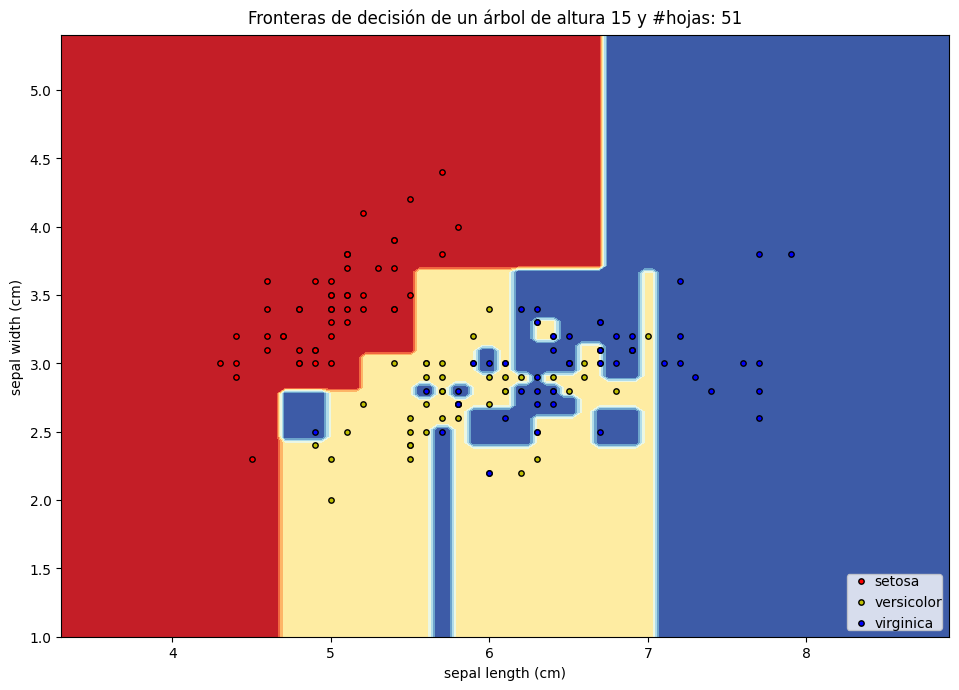

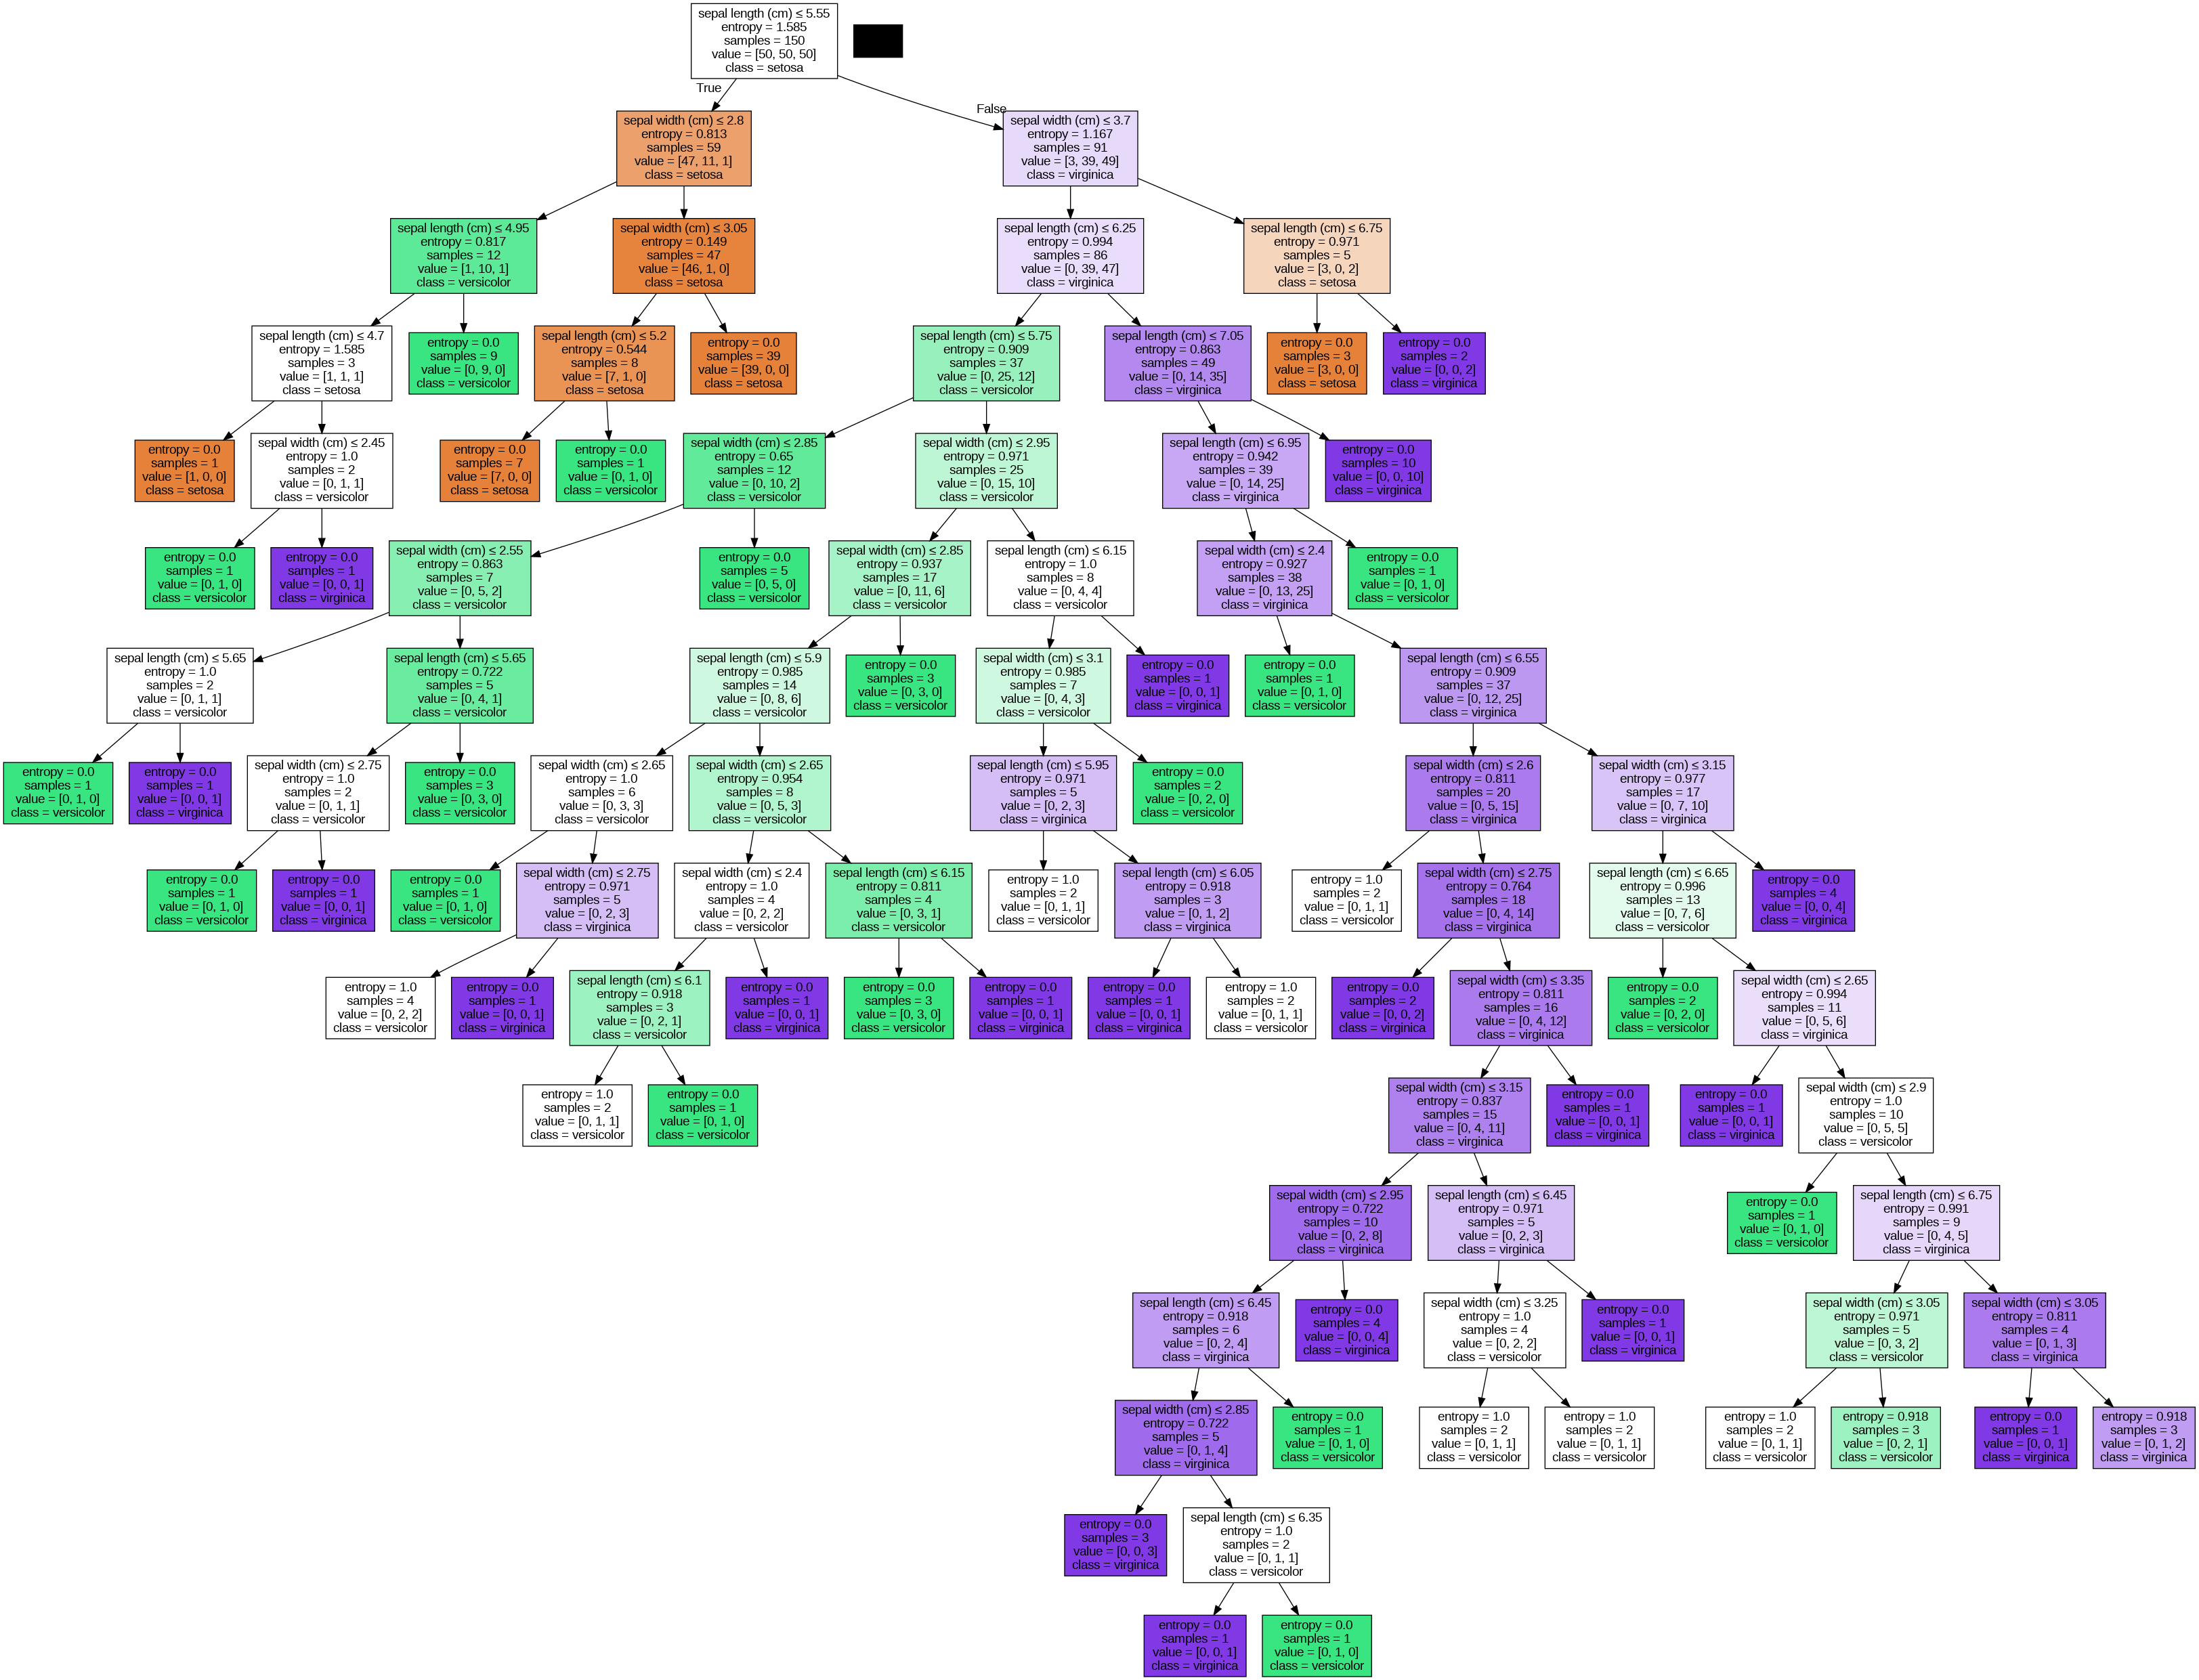

La altura del árbol es:/n 15


In [ ]:
explore_decision_tree_boundaries()


In [ ]:
# prompt: contar filas repetidas en un dataframe

iris_df[['sepal length (cm)','sepal width (cm)']].duplicated().sum()


33

In [ ]:
# prompt: mostrar filas repetidas

iris_df.loc[iris_df[['sepal length (cm)','sepal width (cm)']].duplicated(),['sepal length (cm)','sepal width (cm)']]


,sepal length (cm),sepal width (cm)
16,5.4,3.9
17,5.1,3.5
24,4.8,3.4
26,5.0,3.4
29,4.7,3.2
31,5.4,3.4
34,4.9,3.1
43,5.0,3.5
44,5.1,3.8
45,4.8,3.0


Podemos notar como viendo solo estas dos variables tenemos muchos datos con valores repetidos (aunque pueden pertenecer a diferente clases). Esto nos sirvió para notar que el árbol corta cuando nos quedamos sin datos para seguir cortando, quizás nos quedaron 4 datos en exactamente las mismas coordenadas por lo que no podemos seguir esa rama, suponemos que esta elección debe ser al azar. Al no poner una profundidad máxima tenemos un sobreajuste, mientras menor nivel máximo más nos arriesgamos a un subajuste.

Si no ponemos una altura máxima nos queda un árbol muy grande, de altura 15.

<ipython-input-60-89d0e5aa31da>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


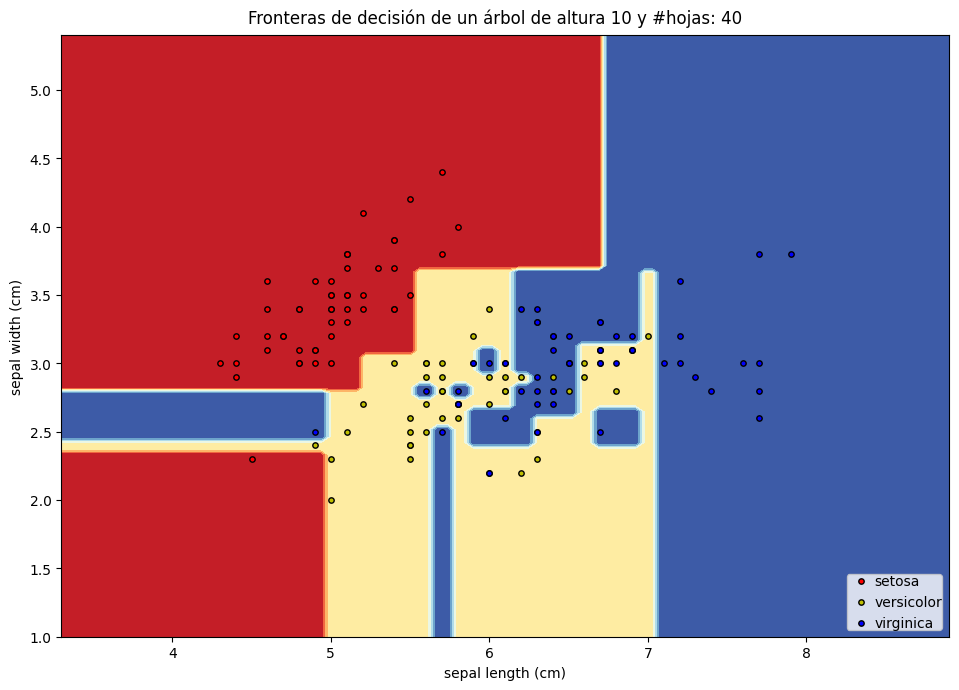

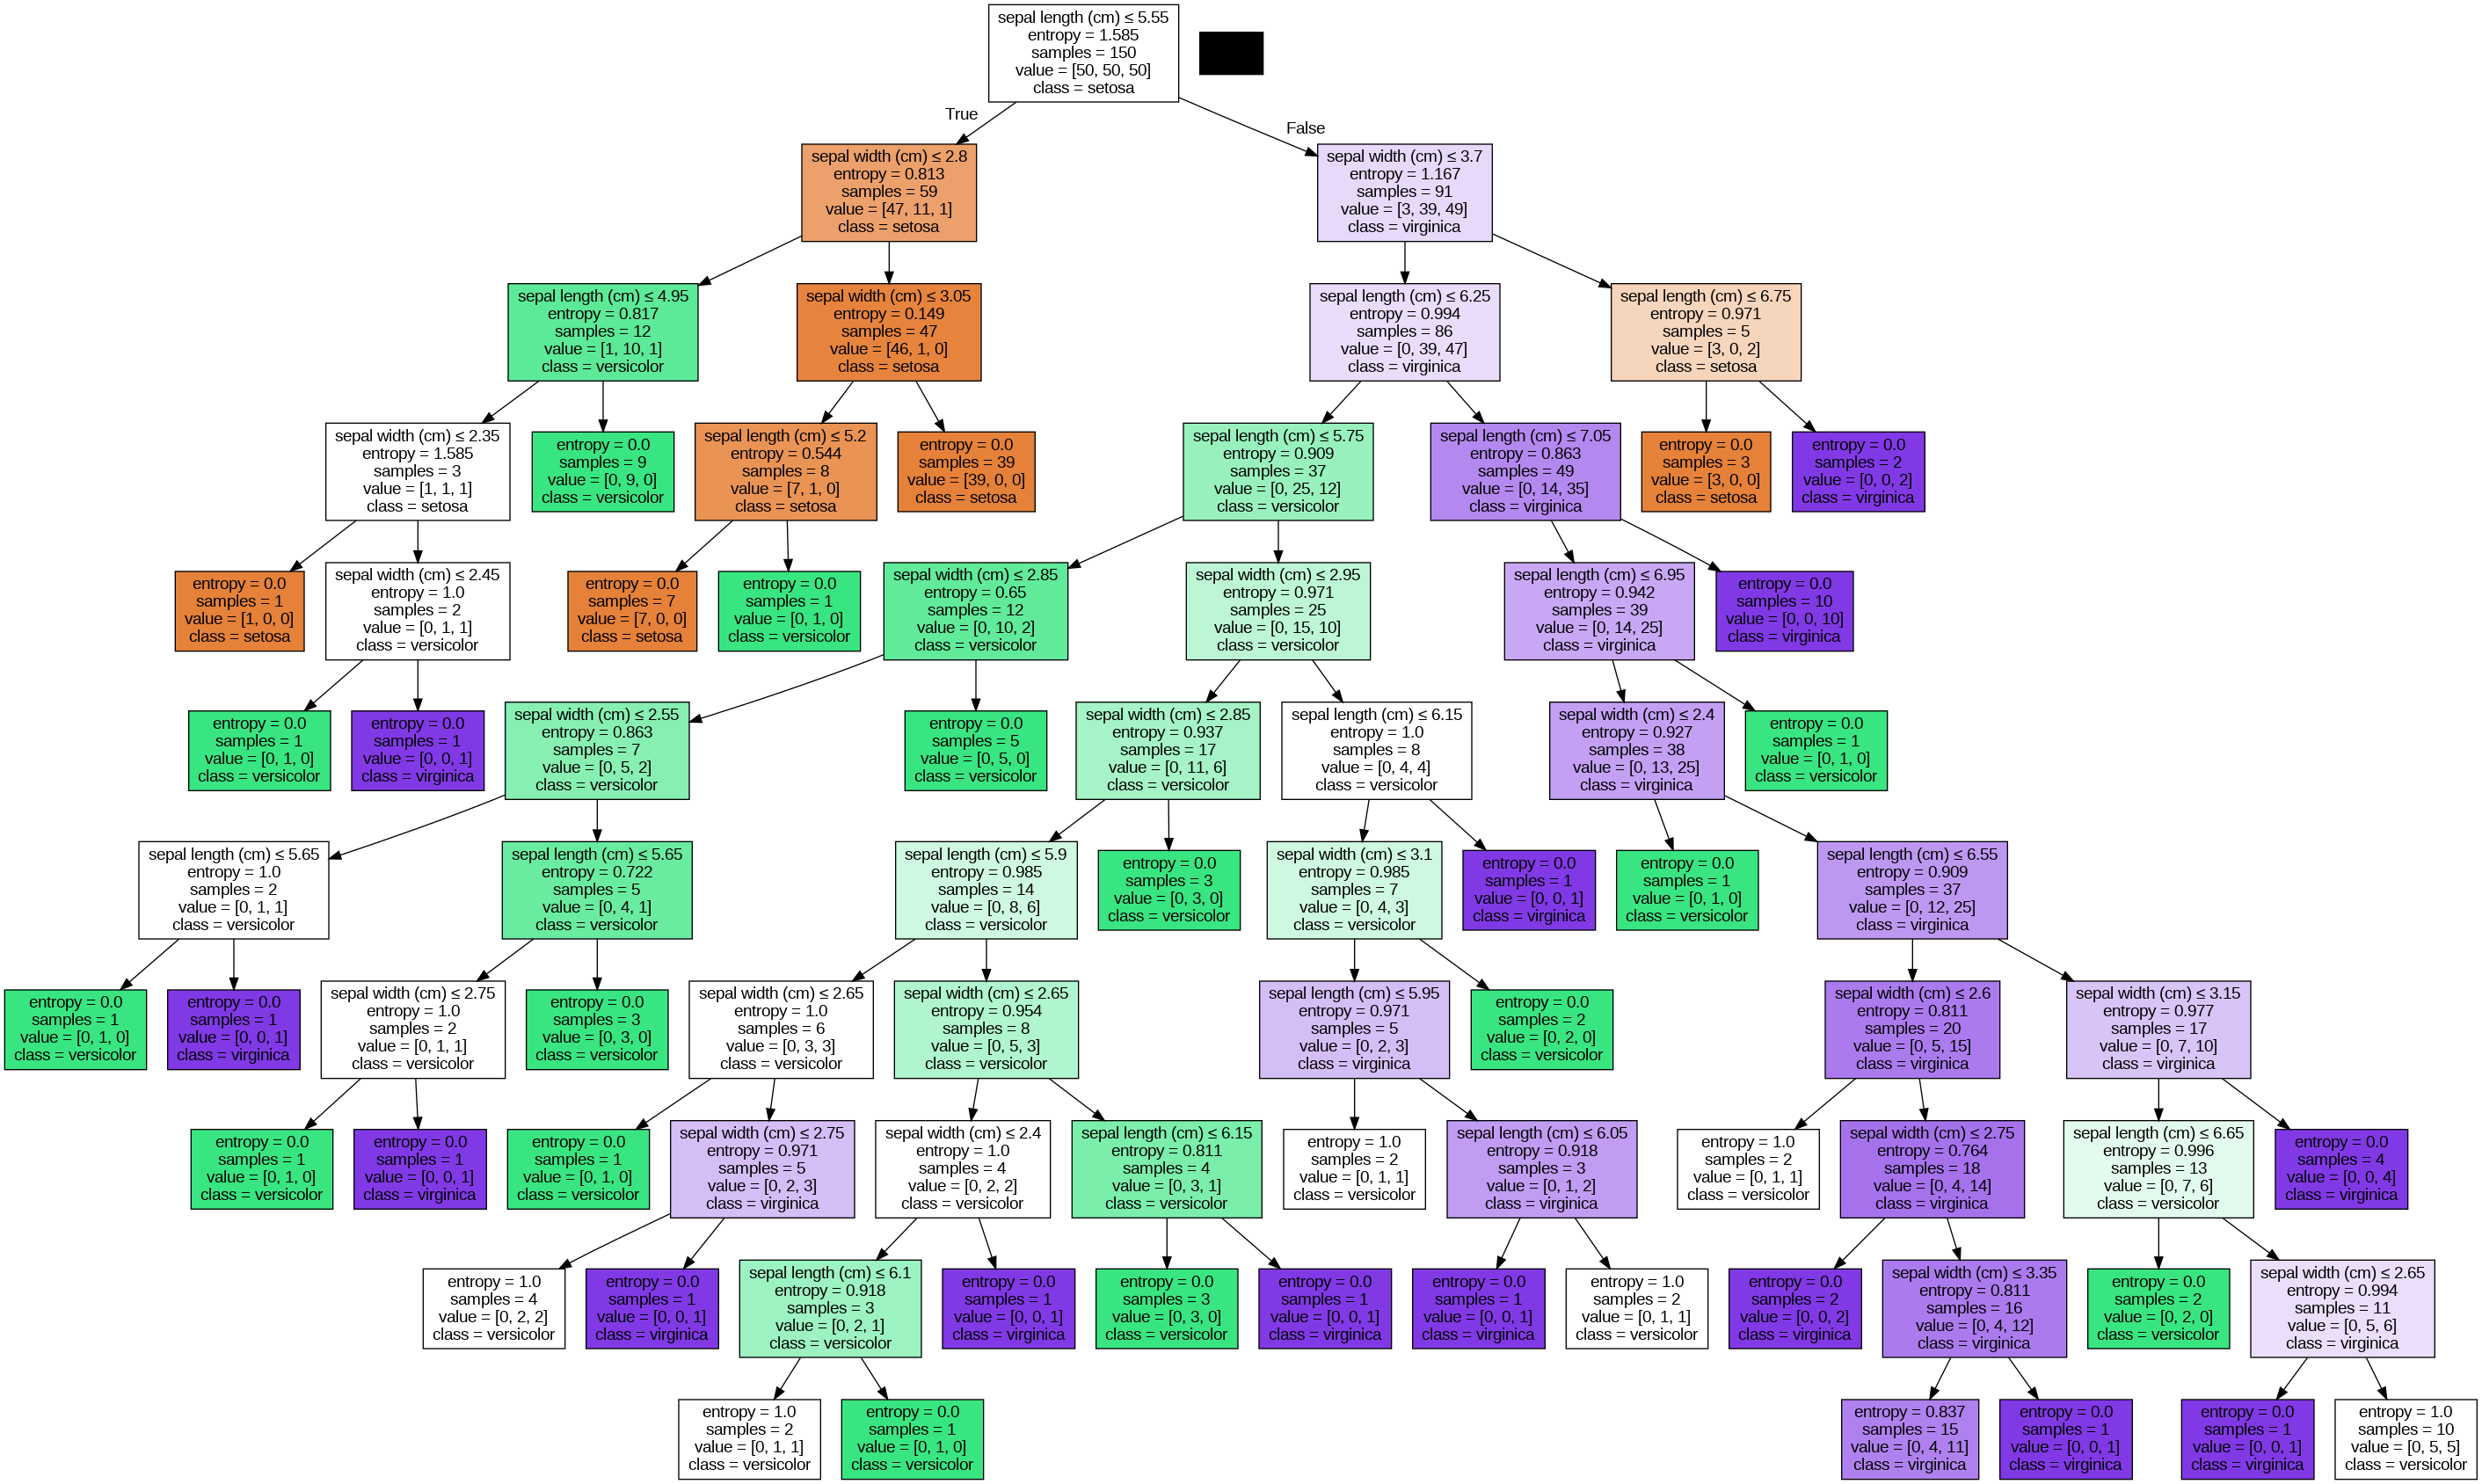

La altura del árbol es:10


In [ ]:
explore_decision_tree_boundaries(10)

<ipython-input-65-edd65b96974c>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


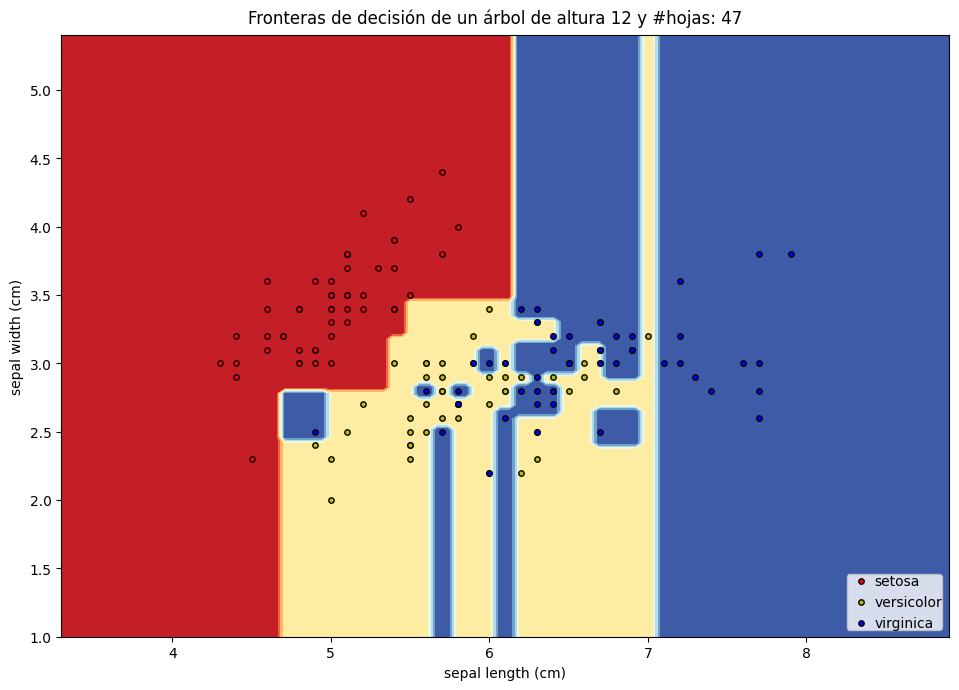

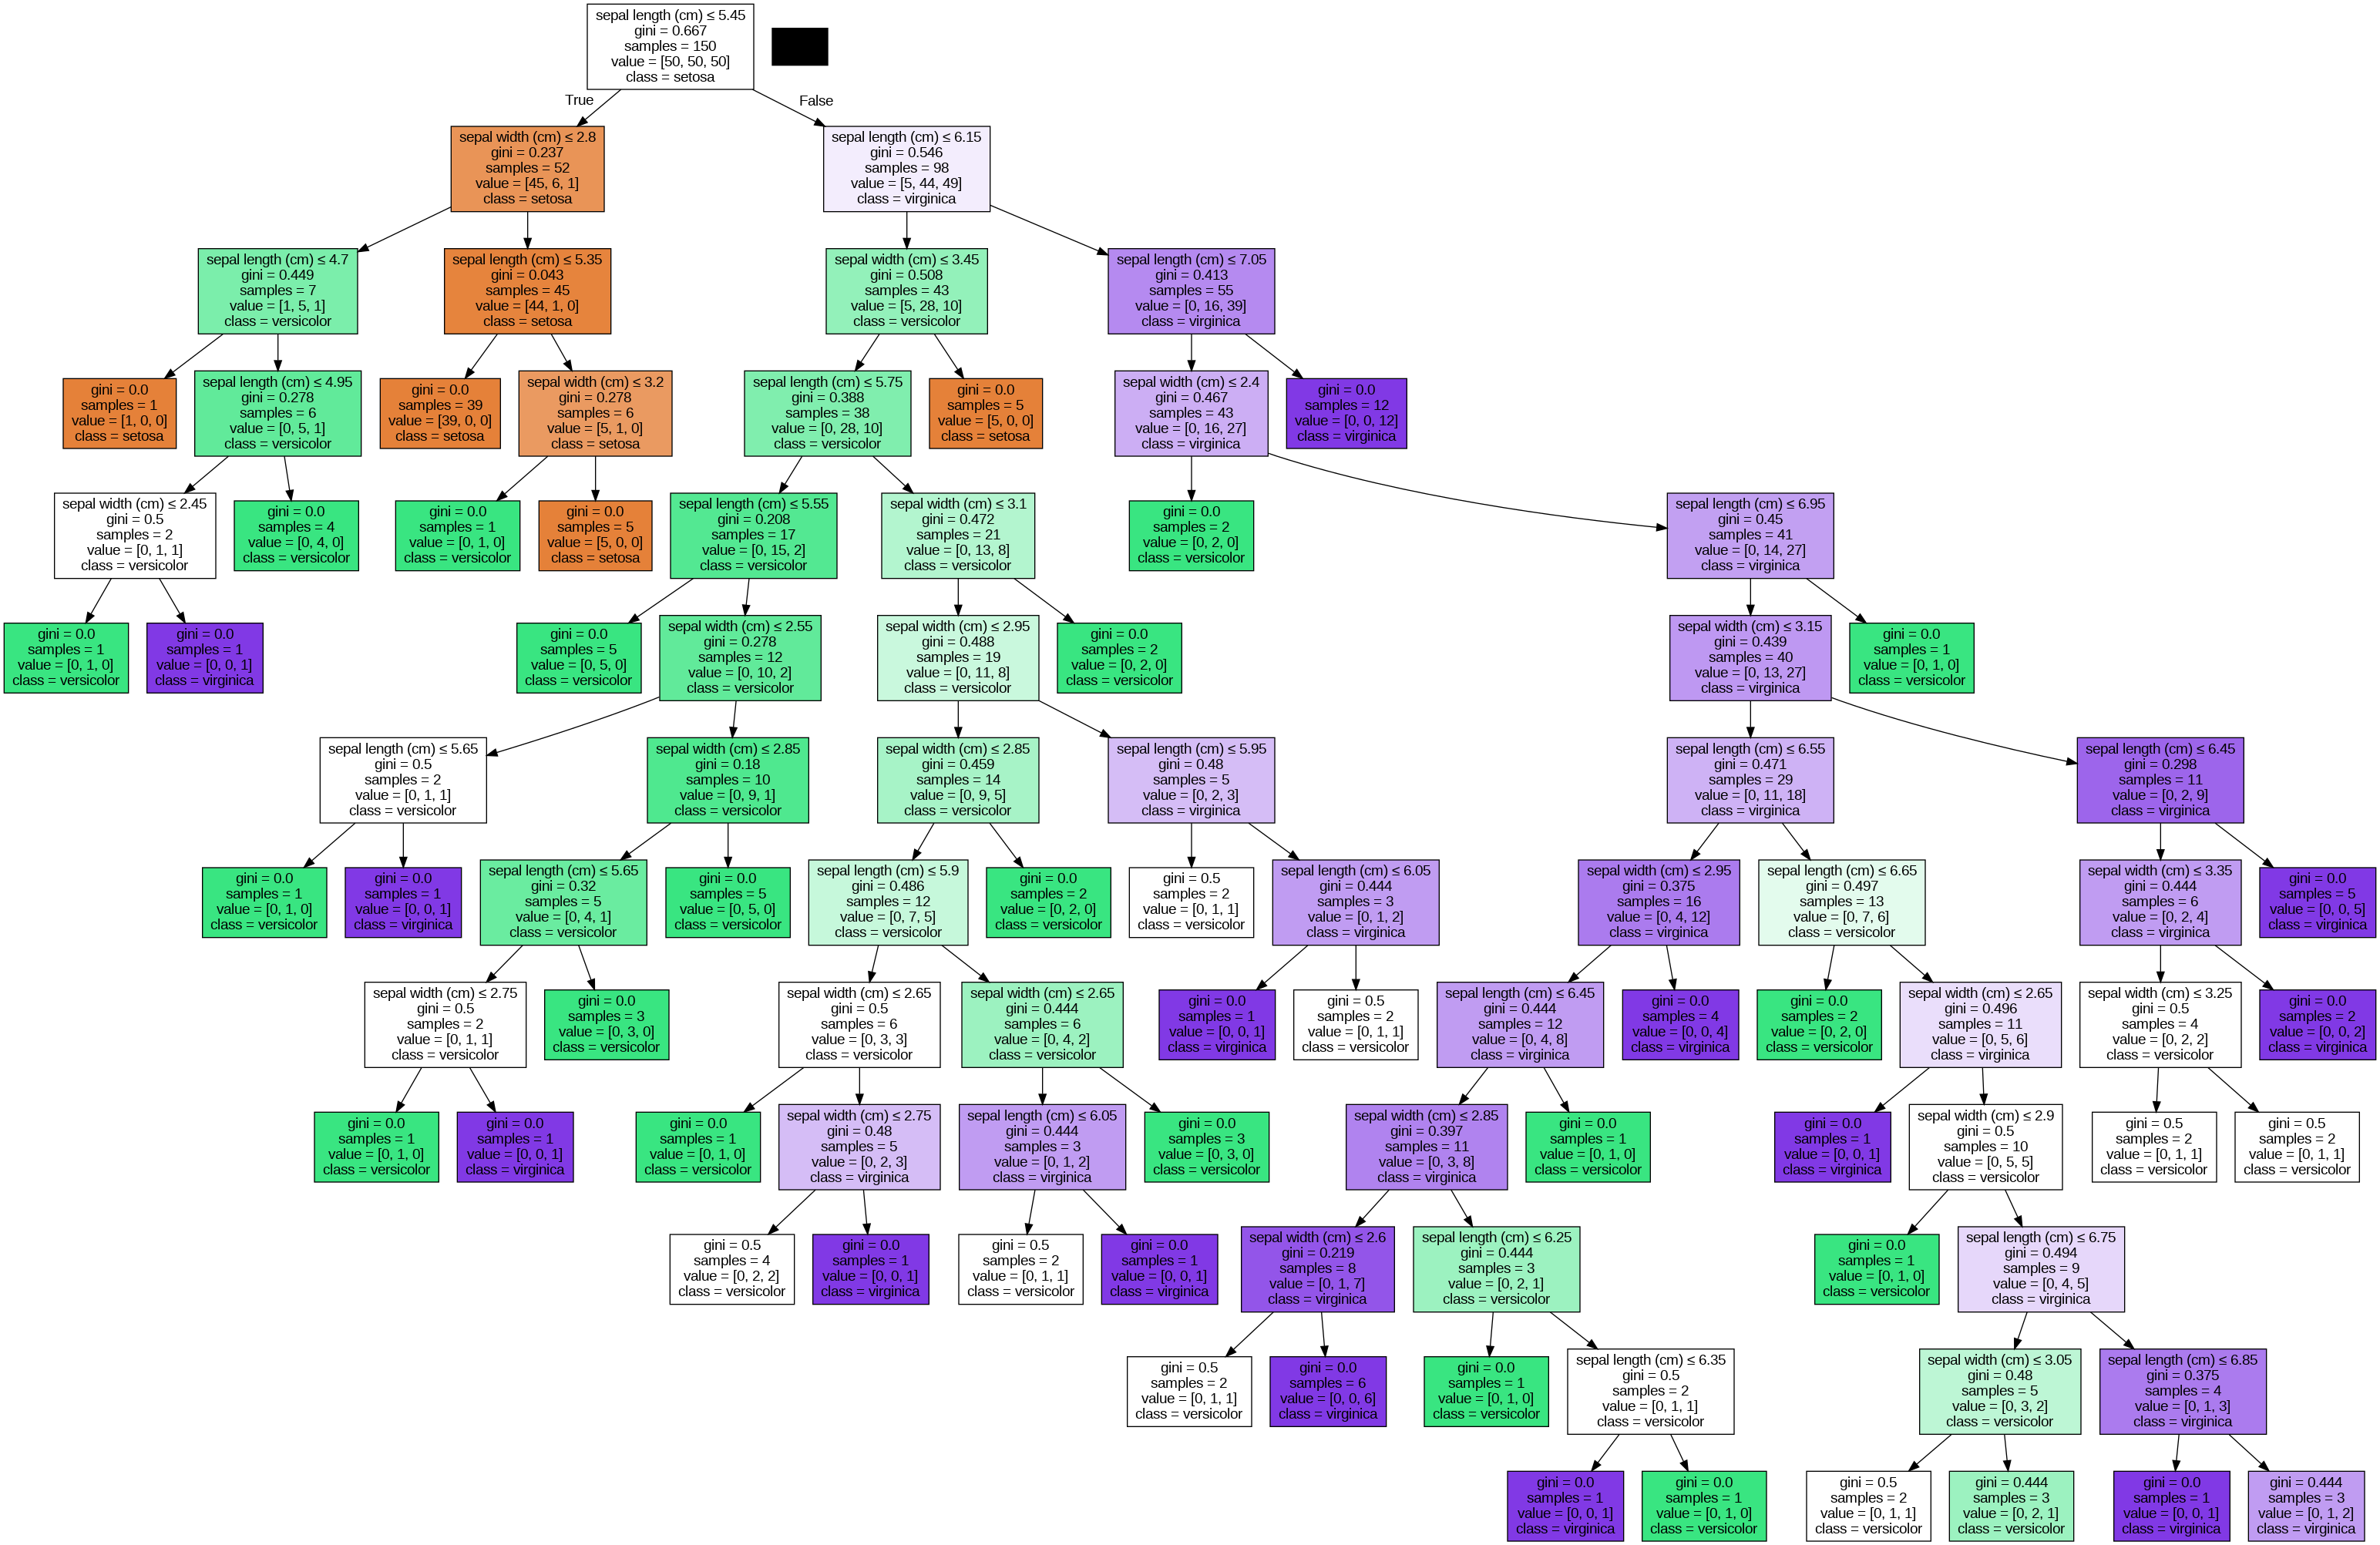

La altura del árbol es: 12


In [ ]:
explore_decision_tree_boundaries(criterion='gini')